## Exploratory Data Analysis

Importing Necessary Python Library's

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Importing Dataset :  

In [37]:
df = pd.read_csv('Cleaned_Dataset.csv')

In [38]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,group C,bachelor's degree,standard,incomplete,married,regularly,yes,3,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,incomplete,married,sometimes,yes,0,school_bus,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,incomplete,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,incomplete,married,never,no,1,school_bus,5 - 10,45,56,42
4,4,male,group C,some college,standard,incomplete,married,sometimes,yes,0,school_bus,5 - 10,76,78,75


### Gender Distribution

In [39]:
df.groupby('Gender')['Gender'].count()

Gender
female    15424
male      15217
Name: Gender, dtype: int64

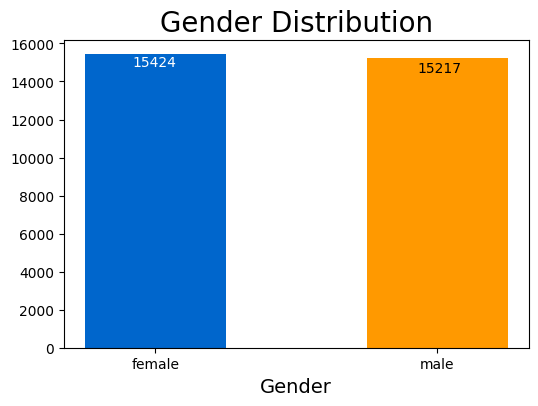

In [40]:
a = df.groupby('Gender')['Gender'].count().index
b = df.groupby('Gender')['Gender'].count().values
colors = (["#0066cc","#ff9900"])
plt.figure(figsize=(6,4))
plt.bar(a,b, width=0.5, color=colors)
plt.title("Gender Distribution", size=20)
plt.xlabel('Gender', fontsize=14)
plt.text(-0.08,14800,b[0],color='w')
plt.text(0.93,14500,b[1],color='k')
plt.show()

##### From the above chart we have analysed that:  
#### The no. of female in the data is more than the no. of males

### Parent's Education Effect On Student Mark's

In [41]:
df.groupby('ParentEduc').agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.445978,69.189667,68.456711
some high school,62.584013,65.510785,63.632409


In [42]:
gb = df.groupby('ParentEduc').agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})

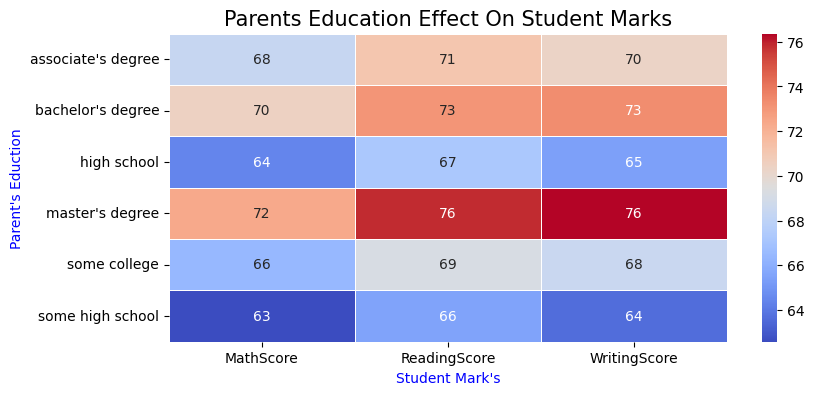

In [43]:
plt.figure(figsize=(9,4))
sns.heatmap(gb, 
            annot=True, 
            cmap='coolwarm',
            linewidths=0.5)
plt.title("Parents Education Effect On Student Marks", size=15)
plt.xlabel("Student Mark's", c='b')
plt.ylabel("Parent's Eduction", c='b')
plt.show()

##### From the above chart we have concluded that:  
#### The Education of parents have a good impact on students marks

### Parent Marital Status Impact On Their Children Mark's

In [44]:
df.groupby('ParentMaritalStatus').agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.650161,69.379561,68.406177
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


In [45]:
a = df.groupby('ParentMaritalStatus').agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})

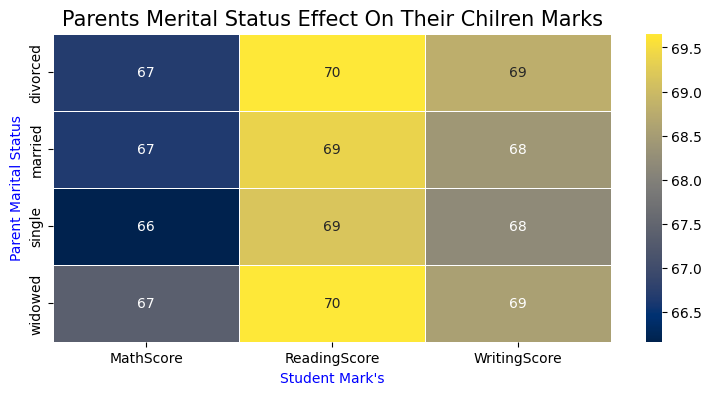

In [46]:
plt.figure(figsize=(9,4))
sns.heatmap(a, 
            annot=True, 
            cmap='cividis',
            linewidths=0.5)
plt.title("Parents Merital Status Effect On Their Chilren Marks", size=15)
plt.xlabel("Student Mark's", c='b')
plt.ylabel("Parent Marital Status", c='b')
plt.show()

##### From the above chart we have concluded that:  
#### There is no/negligible impact on the student marks due to their parents marital status

### Distribution of Ethnic Groups

In [47]:
df['EthnicGroup'].unique()

array(['group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

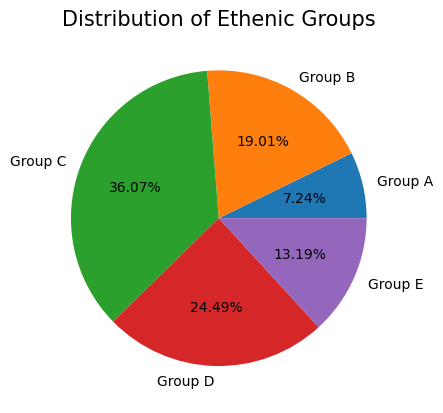

In [64]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

label = ['Group A','Group B','Group C','Group D','Group E']
mylist =[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],
         groupD['EthnicGroup'],groupE['EthnicGroup']]

plt.pie(mylist, labels=label, autopct='%1.2f%%')
plt.title("Distribution of Ethenic Groups",size=15)
plt.show()

##### From the above chart we have concluded that:  
#### Ehenic Groups C and D together form the majority 60% + of the dataset

### Distribution Of Practice Slort

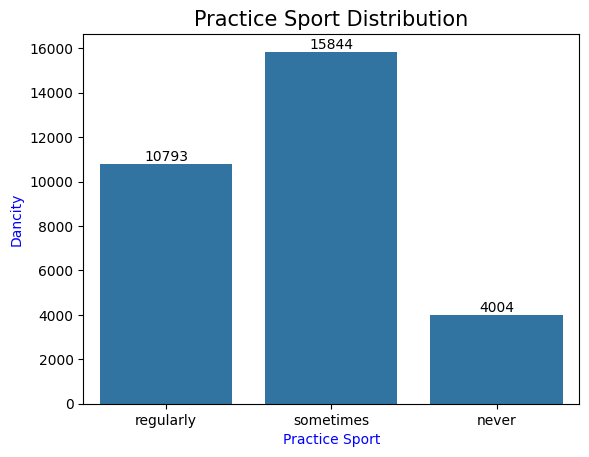

In [88]:
ax = sns.countplot(data= df, x='PracticeSport')
ax.bar_label(ax.containers[0])
plt.title('Practice Sport Distribution', size=15)
plt.ylabel('Dancity', c='b')
plt.xlabel('Practice Sport', c='b')
plt.show()

##### From the above chart we have concluded that:  
#### Most students engage in sports occasionally, while regular participation is noticeably lower.

### 🎯 Overall Summary

* ✔ The dataset is well-cleaned and ready for modeling or further analysis
* ✔ Parent education is the most influential socio-economic factor affecting student success
* ✔ Other demographic factors like gender & marital status show minimal effect
* ✔ Sports and extracurricular participation show potential for further correlation studies